# PHYS 5640 - Project 4
## Steven Stetzler

In [1]:
# Handy packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
# Plotting parameters
rcParams['figure.figsize'] = [12, 12]
rcParams['font.size'] = 24
rcParams['axes.labelsize'] = 28
rcParams['axes.labelpad'] = 15

# 1. Finite-difference method for advection equation

We wish to numerically solve the advection equation given by
\begin{equation}
\tag{1}
\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = 0
\end{equation}

Using the Lax finite-difference scheme, this PDE can be solved numerically on a discretized grid in time and space, with grid spacings in time of $\Delta t$ and grid spacings in space of $\Delta x$. First we start with a Forward-Time Central-Space (FTCS) scheme:

$$
\frac{\partial u}{\partial t} = \frac{u_j^{n+1} - u_j^n}{\Delta t}, \qquad \frac{\partial u}{\partial x} = \frac{u_{j+1}^n - u_{j-1}^n}{2\Delta x}
$$

and we replace $u_j^{n}$ with the average of the neighbors of $u_j^{n}$:

$$
\frac{\partial u}{\partial t} = \frac{u_j^{n+1} - \frac{1}{2}\left( u_{j+1}^n + u_{j-1}^n \right)}{\Delta t}, \qquad \frac{\partial u}{\partial x} = \frac{u_{j+1}^n - u_{j-1}^n}{2\Delta x}
$$

which allows us to solve the advection equation by substituting these discrete approximations with the derivatives in Eq. 1:

$$
\frac{\partial u}{\partial t} + v \frac{\partial u}{\partial x} = 0\\
\frac{u_j^{n+1} - \frac{1}{2}\left( u_{j+1}^n + u_{j-1}^n \right)}{\Delta t} + v \frac{u_{j+1}^n - u_{j-1}^n}{2\Delta x} = 0
$$
\begin{equation}
\tag{2}
u_{j}^{n+1} = \frac{1}{2}\left( u_{j+1}^n + u_{j-1}^n \right) - \frac{v\Delta t}{2 \Delta x} \left(u_{j+1}^n - u_{j-1}^n \right)
\end{equation}

We can perform a Von Neumann stability analysis to obtain good parameters for the grid spacing $\Delta x$ and $\Delta t$ of our simulation. We start by consdering solutions of the form

$$
u_j^n \sim e^{ik x_j}
$$

where $x_j = x_0 + j \Delta x$ and $k$ is the wavenumber of this solution. In amplifying the solution, the Lax method will produce a new value at every time step that is some multiple of the old value:

$$
u_j^{n+1} = \xi_k u_j^n = \xi_k e^{ik x_j}
$$

We can simply plug in the above to Eq. 2 to obtain $\xi_k$:

$$
\xi_k e^{ik x_j} = \frac{1}{2}\left( e^{ik(x_j + \Delta x)} + e^{ik(x_j - \Delta x)} \right) - \frac{v\Delta t}{2 \Delta x} \left(e^{ik(x_j + \Delta x)} - e^{ik(x_j - \Delta x)} \right) \\
\xi_k = \frac{1}{2}\left( e^{ik\Delta x} + e^{-ik\Delta x} \right) - \frac{v\Delta t}{2 \Delta x} \left(e^{-ik\Delta x} - e^{ik\Delta x} \right)
$$
\begin{equation}
\label{eqn:discrete_amplification}
\xi_k = \cos(k \Delta x) - i \frac{v \Delta t}{\Delta x} \sin(k \Delta x)
\end{equation}

The solutions to the Lax method are stable if $\xi_k$ satisfies the condition $\lvert \xi_k \rvert < 1$:

$$
\lvert \xi_k \rvert = \sqrt{ \cos^2(k \Delta x) + \left(\frac{v \Delta t}{\Delta x}\right)^2 \sin^2(k \Delta x) }
$$

Since we know that $\cos^2(x) + \sin^2(x) = 1$ we can infer the following stability conditions:

$$
\lvert \xi_k \rvert = \sqrt{ \cos^2(k \Delta x) + \left(\frac{v \Delta t}{\Delta x}\right)^2 \sin^2(k \Delta x) } \\
\rightarrow \lvert \xi_k \rvert = 1, \text{   if } \frac{v \Delta t}{\Delta x} = 1 \\
\rightarrow \lvert \xi_k \rvert < 1, \text{   if } \frac{v \Delta t}{\Delta x} < 1 \\
\rightarrow \lvert \xi_k \rvert > 1, \text{   if } \frac{v \Delta t}{\Delta x} > 1 \\
$$

We can also compute the exact amplification factor produced by the advection equation. First, we assume plane wave solutions of the form

$$
u(x, t) = A(t) e^{ikx}
$$

we then plug this solution into Eq. 1 to obtain:

$$
\frac{\partial (A(t) e^{ikx})}{\partial t} + v \frac{\partial (A(t) e^{ikx})}{\partial x } = 0 \\
\dot{A}(t) e^{ikx} = -ikv A e^{ikx} \\
\dot{A}(t) = -ikv A
$$

Solving this differential equation we obtain

$$
A(t) = A(t=0) e^{-ikvt} \\
\rightarrow u(x, t) = A(t=0) e^{-ikvt} e^{ikx}
$$

The exact amplification factor is then computed as

$$
\xi_k = \frac{u(x, t + dt) }{u(x, t)} = \frac{A(t = 0) e^{-ikv (t + dt)} e^{ikx} }{A(t = 0) e^{-ikvt}e^{ikx}} \\
\rightarrow \xi_k = e^{-ikv dt}
$$

We can re-express $\xi_k$ using Euler's formula as

\begin{equation}
\tag{3}
\xi_k = \cos(kv dt) - i \sin(kv dt)
\end{equation}

$$
\lvert \xi_k \rvert = \sqrt{\cos^2(kv dt) + \sin^2(kv dt)} = 1
$$

We then see that the norm of the amplification factor of the Lax method (Eq. 3) is exactly equal to the norm of the exact amplification factor (Eq. 4) only when the term $v \Delta t / \Delta x = 1$. For any other value of this term, the discrete approximate of Eq. 1 will not provide correct results.

In the following code, we simulate a system evolved using the advection equation and the Lax method with the initial condition $u(x, t = 0) = \exp(-x^2/w_2)$ which is simply a Gaussian. The spatial gridding for each simulation is $\Delta x = 0.1$ and the parameter $v = 1$.

In [3]:
# Apply the update rule over the whole grid in time
# Uses Eq. (2) to find the values of the next point in time of the grid
def update_advection(grid, delta_x, delta_t, v):
    xs, times = grid.shape
    
    for t in range(times - 1):
        right = np.roll(grid[:, t], -1, axis=0)
        left = np.roll(grid[:, t], 1, axis=0)
        
        # Eq. (2)
        grid[:, t + 1] = 0.5 * (right + left) - (0.5 * v * delta_t / delta_x) * (right - left)
        grid[0, :] = 0
        grid[xs - 1, :] = 0

# Initialize a grid with initial conditions of a gaussian and evolve the system
# with the advection equation with v = 1
def advection(min_x, max_x, delta_x, min_t, max_t, delta_t, v=1, w=5):
    range_x = max_x - min_x
    range_t = max_t - min_t

    num_x, num_t = int(range_x / delta_x), int(range_t / delta_t)
    grid = np.zeros((num_x, num_t))
    w = 5
    grid[:, 0] = np.exp(-np.linspace(min_x, max_x, int(range_x / delta_x))**2 / w**2)
    update_advection(grid, delta_x, delta_t, v)
    return grid

We simulate the system over a range of x values $x \in \left[-20, 50 \right]$ with a spatial gridding of $\Delta x = 0.1$ and over a range of time $t \in \left[ 0, 25 \right]$ with a temporal gridding of $\Delta t = 0.06$.

In [4]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.06

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

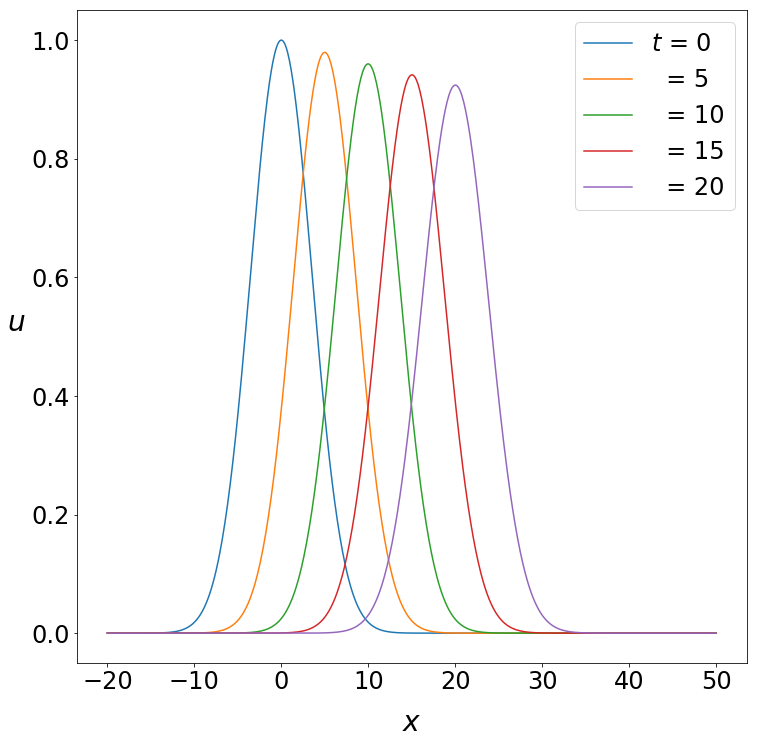

In [5]:
plt.plot(locations, grid[:, int(0 / delta_t)], label=r'$t$ = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(10 / delta_t)], label='  = 10')
plt.plot(locations, grid[:, int(15 / delta_t)], label='  = 15')
plt.plot(locations, grid[:, int(20 / delta_t)], label='  = 20')

plt.xlabel(r"$x$")
plt.ylabel(r"$u$", rotation=0)

plt.legend()
plt.show()

We notice that, while the solution is stable over time, the amplitude of the wave decreases in time. This is because the amplification factor $\xi_k < 1$ since the quantity $v \Delta t / \Delta x = 0.6 < 1$. Even though these solutions are stable, they are incorrect since the amplification factor is not identically equal to 1.

Next, we run the simulation again with the same initial conditions, spatial gridding, and space and time ranges but with $\Delta t = 0.1$ instead.

In [6]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.10

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

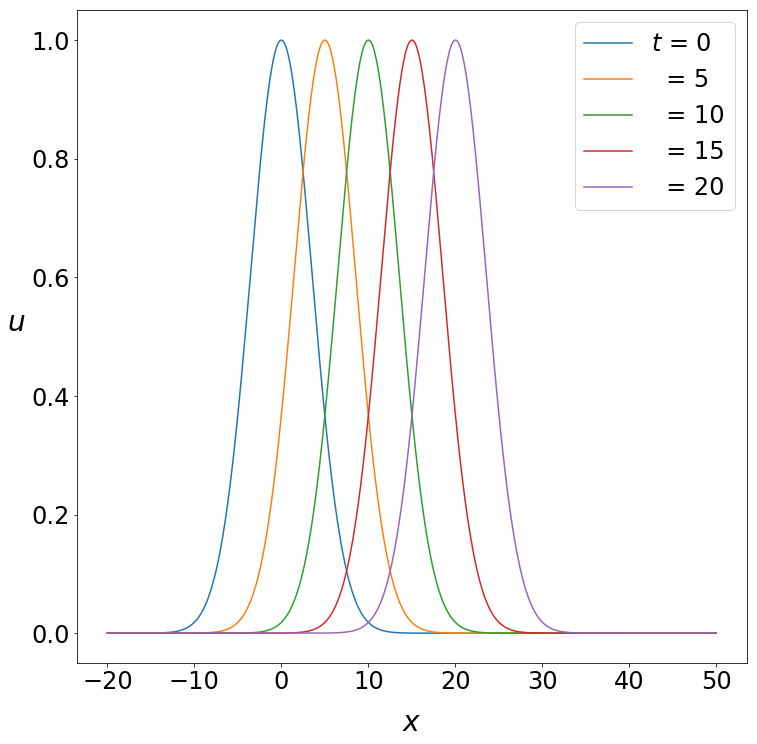

In [7]:
plt.plot(locations, grid[:, int(0 / delta_t)], label=r'$t$ = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(10 / delta_t)], label='  = 10')
plt.plot(locations, grid[:, int(15 / delta_t)], label='  = 15')
plt.plot(locations, grid[:, int(20 / delta_t)], label='  = 20')

plt.xlabel(r"$x$")
plt.ylabel(r"$u$", rotation=0)

plt.legend()
plt.show()

With $\Delta t = 0.1$ we find that the solution is as expected: a wave travelling to the right without decay. The decy previously observed has vanished because the amplification factor $\xi_k = 1$ since the quantity $v\Delta t / \Delta x = 1$.

Next, we will run the simulation again with the same spatial gridding and space and time ranges, but with $\Delta t = 0.14$.

In [26]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.14

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

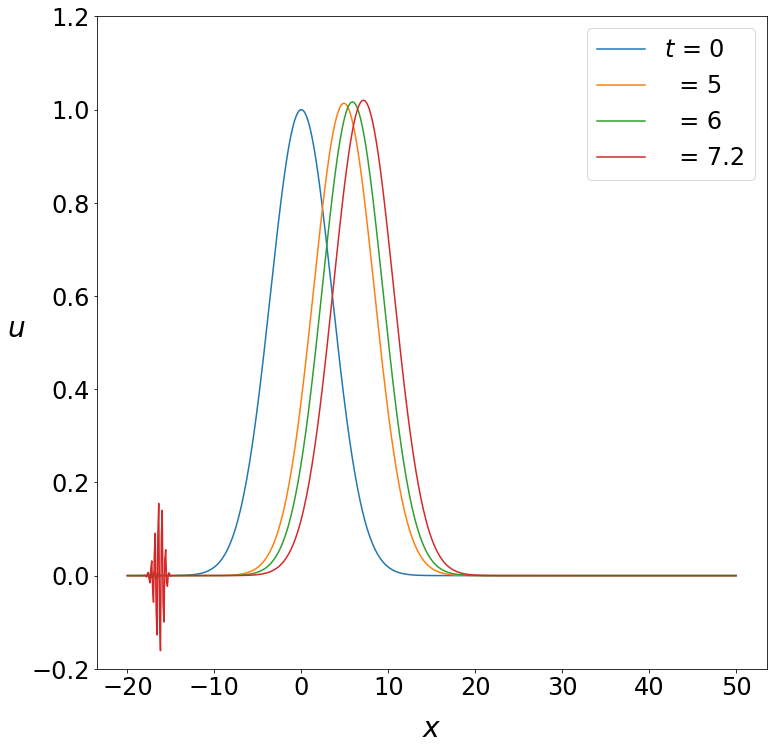

In [29]:
plt.plot(locations, grid[:, int(0 / delta_t)], label=r'$t$ = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(6 / delta_t)], label='  = 6')
plt.plot(locations, grid[:, int(7.2 / delta_t)], label='  = 7.2')

plt.ylim(-0.2, 1.2)

plt.xlabel(r"$x$")
plt.ylabel(r"$u$", rotation=0)

plt.legend()
plt.show()

We observe that the amplitude of the wave grows over time and at $t \approx 7.2$, the wave becomes unstable. The increasing amplitude and the instability of the solution stems from the fact that the amplification factor $\xi_k > 1$ since the quantituty $v \Delta t / \Delta x = 1.4 > 1$. If $\xi_k > 1$, our simulation with the Lax method will produce unstable solutions.

Next, we will explore energy conservation in this system. We will define the energy of the system as

\begin{equation}\tag{3}
E = \int_{-\infty}^{\infty}  u^2(x, t) dx
\end{equation}

We expect that this quantity is conserved because if we take the time derivative of Eq. 3 we obtain:

$$
\frac{\partial E}{\partial t} = \int_{-\infty}^{\infty} \frac{\partial u^2}{\partial t} dx \\
= \int_{-\infty}^{\infty} 2 u \frac{\partial u}{\partial t} dx
$$

using Eq. 1 to swap the time derivative of $u$ for a spatial derivative we obtain

$$
\frac{\partial E}{\partial t} = -v \int_{-\infty}^{\infty} 2 u \frac{\partial u}{\partial x} dx \\
= -v \int_{-\infty}^{\infty} \frac{\partial u^2}{\partial x} dx \\
= -v \big\rvert_{-\infty}^{\infty}
$$

Given the boundary conditions of this system: $u(-\infty) = u(\infty) = 0$ we obtain

$$
\frac{\partial E}{\partial t} = -v \big\rvert_{-\infty}^{\infty} = 0
$$

and thus we expect this energy defintion to be a conserved quantity.

We will simulate the evolution of the initial Gaussian wave over several values of the temporal grid spacing $\Delta t$ and observe how the energy of the system changes with respect to the initial energy $E_0 = E(t=0)$.

In [10]:
# The "energy" of the system
# Eq. (3)
def advection_energy(grid):
    return np.sum(grid**2, axis=0)

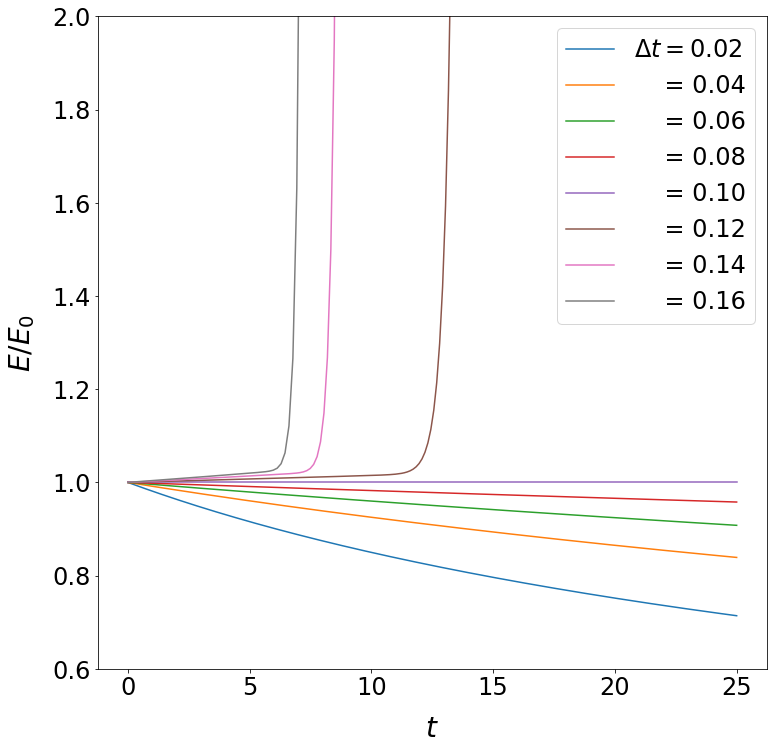

In [11]:
for delta_t in np.arange(0.02, 0.18, 0.02):
    min_x, max_x, delta_x, min_t, max_t = -20, 50, 0.1, 0, 25
    grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

    locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))
    
    if delta_t != 0.02:
        plt.plot(times, advection_energy(grid) / advection_energy(grid)[0], label=r"    = {:0.2f}".format(delta_t))
    else:
        plt.plot(times, advection_energy(grid) / advection_energy(grid)[0], label=r"$\Delta t = {:0.2f}$".format(delta_t))

        
plt.xlabel(r"$t$")
plt.ylabel(r"$E / E_0$")
        
plt.ylim(0.6, 2)
plt.legend()
plt.show()

We observe that for $v\Delta t / \Delta x < 1$ and $v\Delta t / \Delta x > 1$ this energy is not conserved. For $v\Delta t / \Delta x < 1$, the energy decreases with time. For $v\Delta t / \Delta x > 1$ the energy gradually increases before exploding once the solution becomes unstable. Only for $v\Delta t / \Delta x = 1$ does the energy remain a conserved quantity throughout the simulation.

# 2. Crank-Nicholson method for diffusion equation

Next, we will attempt to use the Crank-Nicholson finite difference scheme to solve the diffusion equation, which is a parabolic PDE:

\begin{equation}
\tag{1}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
\end{equation}

The Crank-Nicholson method uses the following discretization approximations for the partial derivatives:

$$
\frac{\partial u}{\partial t} = \frac{u_j^{n+1} - u_j^{n}}{\Delta t}, \qquad \frac{\partial^2 u}{\partial x^2} = \frac{u_{j+1}^{n+1/2} - 2 u_{j}^{n+1/2} + u_{j-1}^{n+1/2}}{\Delta x^2}
$$

The half-step approximation for $\frac{\partial^2 u}{\partial x^2}$ is then replaced with the average of the approximate derivative at $n$ and $n + 1$:

$$
\frac{\partial u}{\partial t} = \frac{u_j^{n+1} - u_j^{n}}{\Delta t}, \qquad \frac{\partial^2 u}{\partial x^2} = \frac{\left(u_{j+1}^{n+1} - 2 u_{j}^{n+1} + u_{j-1}^{n+1}\right) + \left(u_{j+1}^{n} - 2 u_{j}^{n} + u_{j-1}^{n}\right)}{2\Delta x^2}
$$

Applying this discretization to Eq. 1 we obtain the following implicit equation

\begin{equation}
\tag{2}
u_j^{n+1} = u_j^n + \frac{D \Delta t}{2\Delta x^2} \left[ \left( u_{j+1}^{n+1} - 2 u_j^{n+1} + u_{j-1}^{n+1} \right) + \left( u_{j+1}^n - 2 u_j^n + u_{j-1}^n  \right)  \right]
\end{equation}

In order to make Eq. 2 useful we must re-arrange all terms evaluated at time $n + 1$ to be on one side of the equation and all terms evaluted at time $n$ to be on the other side. First, we will re-name $D \Delta t / 2 \Delta x^2 = r$.

$$
u_j^{n+1} = u_j^n + r \left[ \left( u_{j+1}^{n+1} - 2 u_j^{n+1} + u_{j-1}^{n+1} \right) + \left( u_{j+1}^n - 2 u_j^n + u_{j-1}^n  \right)  \right] \\
u_j^{n+1} - r \left( u_{j+1}^{n+1} - 2 u_j^{n+1} + u_{j-1}^{n+1} \right) = u_j^n + r \left( u_{j+1}^n - 2 u_j^n + u_{j-1}^n  \right) \\
-r u_{j+1}^{n+1} + \left(1 + 2r\right) u_j^{n+1} - r u_{j-1}^{n+1} = r u_{j+1}^n + \left( 1 - 2r \right) u_j^{n} + r u_{j-1}^n
$$

On both sides, we have some linear combination of components in $u$ along the spatial direction. Thus, if we convert $u_j$ to be the $j^{th}$ component of a vector:

$$
\textbf{u} = \begin{bmatrix}
    u_0 \\
    u_1 \\
    \vdots \\
    u_N
\end{bmatrix}
$$

we can convert the above equation into a matrix equation:

$$
A \textbf{u}^{n+1} = B \textbf{u}^{n}
$$

where $A$ and $B$ are both tri-diagonal matrices of the form
$$ \tag{3}
A = \begin{bmatrix}
1 + 2r  & -r    & 0     & ...    & -r \\
-r      & 1 + 2r & -r    &        & \vdots  \\
0       & -r    & 1 +2 r &        &  \vdots \\
\vdots  &       &       & \ddots & -r  \\
-r      &  ...     & ...    &  -r  & 1 + 2r  \\
\end{bmatrix}
\qquad
B = \begin{bmatrix}
1 - 2r  & r      & 0      & ...    & r \\
r       & 1 - 2r & r      &        & \vdots  \\
0       & r      & 1 - 2r &        &  \vdots \\
\vdots  &        &        & \ddots & r  \\
r       &  ...   & ...    &  r     & 1 - 2r  \\
\end{bmatrix}
$$

The entries in the top right and bottom left of $A$ and $B$ indicate that we are applying periodic boundary conditions to this system.

This allows us to solve for the value of $u$ at time $n+1$ using the following equation

\begin{equation}\tag{4}
\textbf{u}^{n+1} = A^{-1} B \textbf{u}^n
\end{equation}

The Diffusion equation can also be solved exactly with the use of the Fourier Transform. If we define the Fourier Transform as

$$
\mathcal{F}\left(f(x)\right) = \tilde{f}(k) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{- i x k} dx
$$
and the inverse Fourier Transform as
$$
\mathcal{F}^{-1}\left(\tilde{f}(k)\right) = f(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} \tilde{f}(k)e^{ i x k} dk
$$

then we can solve Eq. 1 using the Fourier Transform:

$$
\mathcal{F}\left(\frac{\partial u(x, t)}{\partial t}\right) = \frac{\partial \tilde{u}(k, t)}{\partial t} \\
\mathcal{F}\left( D \frac{\partial^2 u(x, t)}{\partial x^2} \right) = -D k^2 \tilde{u}(k, t)
$$

allowing us to rewrite Eq. 1 as

$$
\frac{\partial \tilde{u}(k, t)}{\partial t} = -D k^2 \tilde{u}(k, t) \\
\rightarrow \tilde{u}(k, t) = \tilde{u}(k, t = 0) e^{-D k^2 t}
$$

where $\tilde{u}(k, t = 0) = \mathcal{F}(u(x, t=0))$. Finally, we can tranform back using the inverse Fourier Transform to obtain a solution for $u(x,t)$:

$$\tag{5}
\label{eqn:exact}
u(x,t) = \mathcal{F}^{-1}\left( \mathcal{F}(u(x, t=0)) e^{-D k^2 t} \right)
$$

In the coded solution below, we will solve the Diffusion equation numerically using the Crank-Nicholson method (Eq. 2 and Eq. 3) and compare it to the exact solution (Eq. 5). We will start with the initial condition

$$
u(x, t=0) = \exp(-x^2 / w^2)
$$

then we will evolve the system according to Eq. 2 along a grid of spatial resolution $\Delta x = 0.1$ and various temporal resolutions $\Delta t$. Throughout, we will use $D = 0.5$ and $w = 10$. The exact solution to the diffusion equation for this initial condition is

\begin{align*}
u(x,t) &= \mathcal{F}^{-1}\left( \mathcal{F}(u(x, t=0)) e^{-D (2\pi k)^2 t} \right) \\
\mathcal{F}(u(x, t=0)) &= \mathcal{F}(e^{- \left(\frac{x}{w}\right)^2} ) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{- \left(\frac{x}{w}\right)^2} e^{-i x k} dx \\
&= e^{-\left( wk / 2\right)^2} \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{- \left(\frac{x}{w} + iwk / 2\right)^2 } dx \\
&= \frac{w}{\sqrt{2}} e^{-(kw / 2)^2} \\
\rightarrow u(x,t) &= \mathcal{F}^{-1}\left( \frac{w}{\sqrt{2}} e^{-(kw / 2)^2} e^{-D (2\pi k)^2 t} \right) \\
&= \frac{w}{\sqrt{2}} \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-(kw / 2)^2} e^{-D (2\pi k)^2 t} e^{ i x k} dk \\
&= \frac{2}{2\sqrt{\pi}} e^{ -\frac{x^2}{4\left(Dt + w^2 / 4\right)} } \int_{-\infty}^{\infty} e^{- \left( k\sqrt{Dt + w^2 / 4} - \frac{ix}{2\sqrt{Dt + w^2/4}} \right)^2} \\
&= \frac{w}{2} \frac{1}{\sqrt{Dt + w^2 / 4}} e^{ - \frac{x^2}{w^2 + 4Dt} }
\end{align*}

$$\tag{6}
\rightarrow u(x, t) = \frac{1}{ \sqrt{ 1 + 4 Dt/w^2 } } \exp\left( - \frac{x^2}{w^2 + 4Dt} \right)
$$

In [12]:
# Update the grid according to the Crank-Nicholson scheme to solve
# the diffusion equation with the diffusion constant D
# Uses Eq. (3) and Eq. (4)
def update_crank_nicholson(grid, delta_x, delta_t, D):
    xs, times = grid.shape
    
    r = (D * delta_t) / (2 * delta_x**2)
    
    # Construct the matrix A (Eq. (3))
    diag = np.eye(xs, xs) * (1 + 2 * r)
    diag_down = np.roll(np.eye(xs, xs), 1, axis=0) * (-r)
    diag_up = np.roll(np.eye(xs, xs), -1, axis=0) * (-r)

    A = diag + diag_down + diag_up

    # Construct the matrix B (Eq. (4))
    diag = np.eye(xs, xs) * (1 - 2 * r)
    diag_down = np.roll(np.eye(xs, xs), 1, axis=0) * (r)
    diag_up = np.roll(np.eye(xs, xs), -1, axis=0) * (r)

    B = diag + diag_down + diag_up
    
    # Compute the matrix that gives us the value of the function at the next time step
    # Eq. (4) without application
    step = np.dot(np.linalg.inv(A), B)
    
    for t in range(times - 1):
        # Eq. (4)
        grid[:, t + 1] = np.dot(step, grid[:, t])
        
# Solve the Diffusion equation with the Crank-Nicholson scheme
# Initial wave is a Gaussian of the form exp( -x^2 / w^2)
# The exact form at all times t is computed and compared to the simulated result
def crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w):
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))
    grid = np.zeros((len(x_vals), len(t_vals)))

    # Initial conditions
    grid[:, 0] = np.exp(- x_vals**2 / w**2)
    # Fill in the grid
    update_crank_nicholson(grid, delta_x, delta_t, D)

    # Compute the real value at all times
    # Eq. (6)
    real = 1. / (np.sqrt(1 + 4 * D * np.outer(np.ones(len(x_vals)), t_vals) / w**2)) * \
                 np.exp(-np.outer(x_vals, np.ones(len(t_vals)))**2 / (w**2 + 4 * D * \
                                                                   np.outer(np.ones(len(x_vals)), t_vals)))        
    # Compute the error = difference between simulated and real value
    error = grid - real
    
    return grid, real, error

We will simulate the Diffusion equation starting with a Gaussian pulse of width $w= 10$ with $D = 0.5$ over the space $x \in \left[ -60, 60 \right]$ for times $t \in \left[ 0, 70 \right]$ with a spacial gridding of $\Delta x = 0.1$ and a temporal gridding of $\Delta t = 0.5$.

In [13]:
min_x, max_x, delta_x, min_t, max_t, delta_t, D, w = -60, 60, 0.1, 0, 70, 0.1, 0.5, 10
x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)

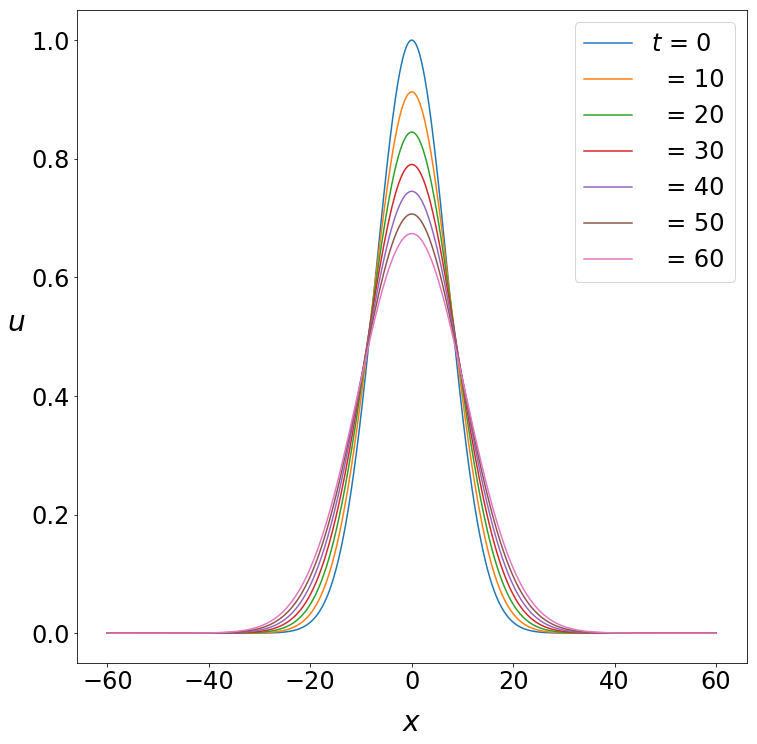

In [14]:
for t in [0, 10, 20, 30, 40, 50, 60]:
    if t == 0:
        plt.plot(x_vals, grid[:, int(t / delta_t)], label=r"$t$ = {:d}".format(t))
    else:
        plt.plot(x_vals, grid[:, int(t / delta_t)], label="  = {:d}".format(t))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$", rotation=0)

plt.legend()
plt.show()

Here we plot $u(x,t)$ at $t = 0, 10, 20, 30, 40, 50, \text{ and } 60$. We notice that the initial Gaussian pulse diffuses as expected.

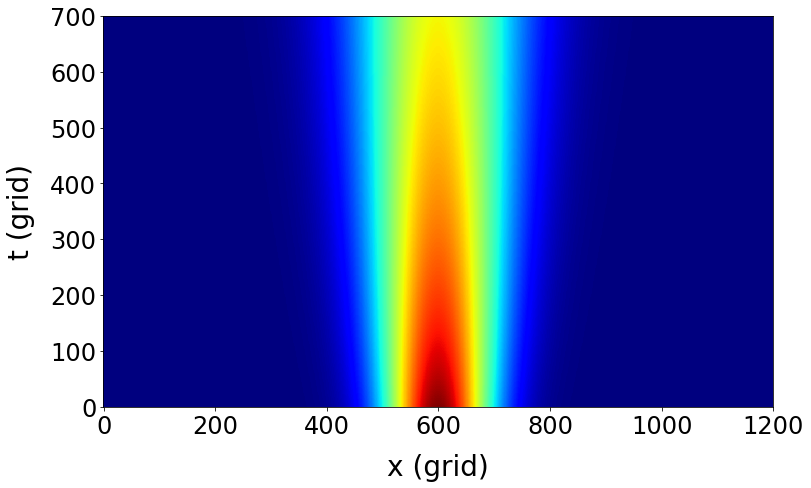

In [15]:
plt.imshow(grid.T, cmap='jet', origin='lower')
plt.xlabel("x (grid)")
plt.ylabel("t (grid)")
plt.show()

Here we show the entire grid as an image, showing how the initial pulse (lower) diffuses over all time.

Next, we will examine the error scaling of the Crank-Nicholson method with the temporal gridding of $\Delta t = 0.125, 0.25, 0.5, 1, 2, 4, \text{ and } 8$. We will examine the error (difference between simulated and exact values for $u(x, t)$) at $x = 0$, which is where the peak of the pulse is.

In [16]:
peak_errors = []
delta_ts = [0.125, 0.25, 0.5, 1, 2, 4, 8]

t_valss = []
peak_errors = []

for delta_t in delta_ts:
    min_x, max_x, delta_x, min_t, max_t, D, w = -60, 60, 0.1, 0, 400, 0.5, 10
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

    grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)
    
    peak = int((max_x - min_x) / delta_x / 2)
    peak_error = error[peak, :]
    t_valss.append(t_vals)
    peak_errors.append(np.abs(peak_error))

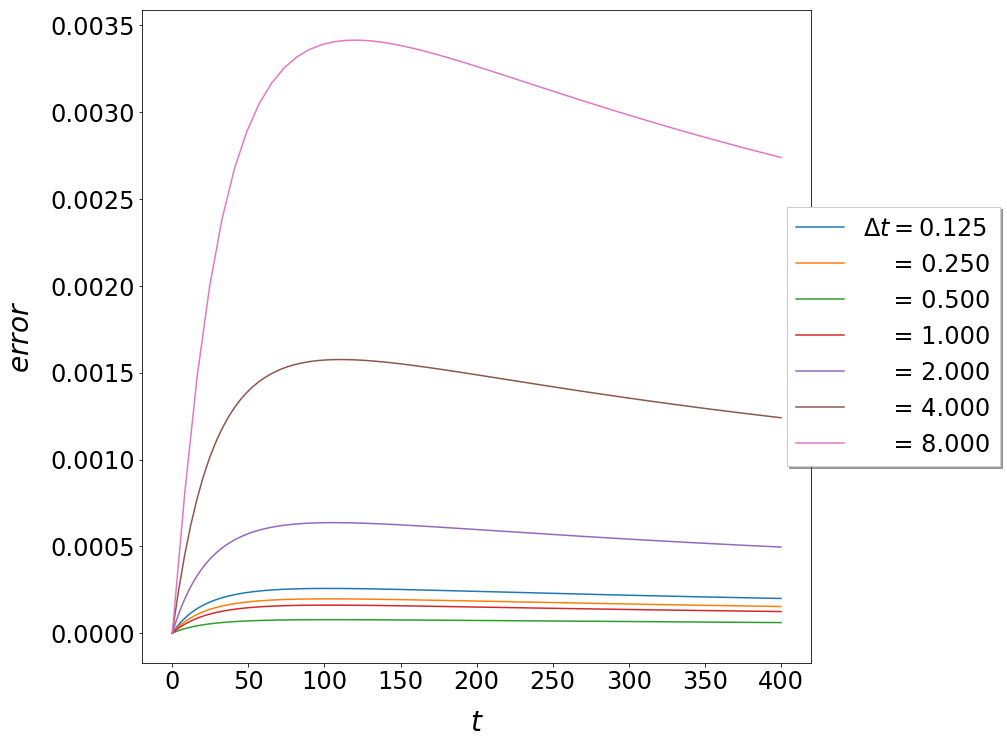

In [17]:
for i, (t_vals, peak_error, delta_t) in enumerate(zip(t_valss, peak_errors, delta_ts)):
    if i == 0:
        plt.plot(t_vals, np.abs(peak_error), label=r'$\Delta t = {:1.3f}$'.format(delta_t))
    else:
        plt.plot(t_vals, np.abs(peak_error), label='    = {:1.3f}'.format(delta_t))

    
plt.legend(loc='right', bbox_to_anchor=(1.3, .5), ncol=1, fancybox=False, shadow=True)

plt.xlabel(r"$t$")
plt.ylabel(r"$error$")

plt.show()

Here, we plot the absolute discrepancy between the simulated and exact values of $u(x = 0, t)$ over the simulation time. We note that as $\Delta t$ decreases, the error decreases as well.

Next, we will examine how the error scales with $\Delta t$ by plotting the error in the peak at $t = 10$ for the same set of $\Delta t$ values.

In [18]:
peak_errors = []
delta_ts = [0.125, 0.25, 0.5, 1, 2, 4, 8]

for delta_t in delta_ts:
    min_x, max_x, delta_x, min_t, max_t, D, w = -60, 60, 0.1, 0, 200, 0.5, 10
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

    grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)

    peak = int((max_x - min_x) / delta_x / 2)
    
    peak_errors.append(np.abs(error[peak, 10]))

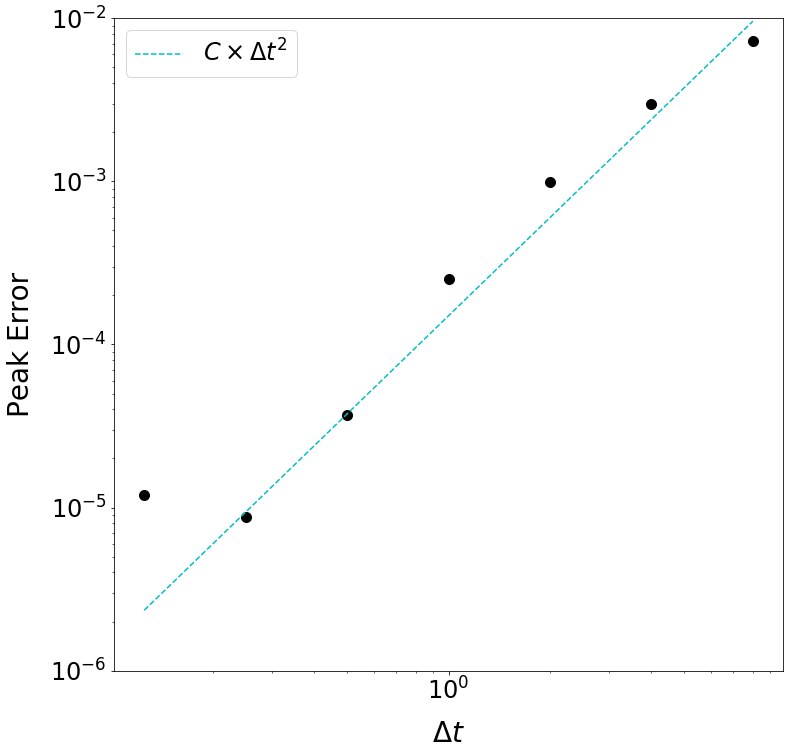

In [19]:
plt.loglog(delta_ts, peak_errors, markersize=10, linestyle='None', marker='o', color='k')
plt.ylim(1e-7, 1e-2)
y = [1.5e-4 * delta_t**2 for delta_t in delta_ts]
plt.loglog(delta_ts, y, linestyle='--', color='c', label=r'$C \times \Delta t^2$')

plt.xlabel(r"$\Delta t$")
plt.ylabel("Peak Error")

plt.ylim(1e-6, 1e-2)

plt.legend()
plt.show()

We find that the error scales as $error \sim \Delta t^2$.

# 3. Korteweg – de Vries equation

We seek to solve numerically the Kortewag - de Vries (KdV) equation, which is given by

\begin{equation}
\tag{1}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + \delta^2 \frac{\partial^3 u}{\partial x^3} = 0
\end{equation}

where $\delta$ is a parameter that governs dispersion. If $\delta = 0$, we obtain the advection equation with $v = u$. The KdV equation can be solved numerically using the explicit leapfrog method:

\begin{equation}
\tag{2}
u_j^{n+1} = u_j^{n-1} - \frac{\Delta t}{3\Delta x} (u_{j+1}^n + u_{j}^n + u_{j-1}^n) ( u_{j+1}^n - u_{j-1}^n ) - \frac{\delta^2 \Delta t}{\Delta x^3} ( u_{j+2}^n - 2 u_{j+1}^n + 2 u_{j-1}^n - u_{j-2}^n )
\end{equation}

In the coded solution below, we solve the KdV equation using the discretization provided by Eq. 2 with $\delta = 0.022$ over the spatial domain $0 < x < 2$ with periodic boundary conditions. The simulation is started with the initial condition $u(x, t = 0) = cos(\pi x)$.

In [20]:
# Fill in the grid according to Eq. (2)
def update_korteweg(grid, delta_x, delta_t, delta):
    xs, times = grid.shape
    
    for t in range(1, times - 1):
        if t % 10 == 0:
            print("-- {:0.2f}% done".format(100. * t / times), end='\r')
        
        previous = grid[:, t - 1]
        now = grid[:, t]
                
        right = np.roll(now, -1, axis=0)
        right_2 = np.roll(now, -2, axis=0)
        
        left = np.roll(now, 1, axis=0)
        left_2 = np.roll(now, 2, axis=0)

        # Eq. (2)
        grid[:, t + 1] = previous - (delta_t / (3 * delta_x)) * (right + now + left) * (right - left) - ((delta**2 * delta_t) / (delta_x**3)) * (right_2 - 2 * right + 2 * left - left_2)
         
# Run the simulation with the initial condition of a cosine wave
def korteweg(min_x, max_x, delta_x, min_t, max_t, delta_t, delta=0.022):
    range_x = max_x - min_x
    range_t = max_t - min_t

    num_x, num_t = int(range_x / delta_x), int(range_t / delta_t)
    
    grid = np.zeros((num_x, num_t))
    # Initial conditions
    grid[:, 0] = np.cos( np.pi * np.linspace(min_x, max_x, int(range_x / delta_x) ) )
    grid[:, 1] = np.cos( np.pi * np.linspace(min_x, max_x, int(range_x / delta_x) ) )
    
    # Fill in the grid
    update_korteweg(grid, delta_x, delta_t, delta)

    return grid

In [21]:
min_x, max_x, delta_x, min_t, max_t, delta_t = 0, 2, 0.01, 0, 11 / np.pi, 1e-5

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

kdv_grid = korteweg(min_x, max_x, delta_x, min_t, max_t, delta_t)

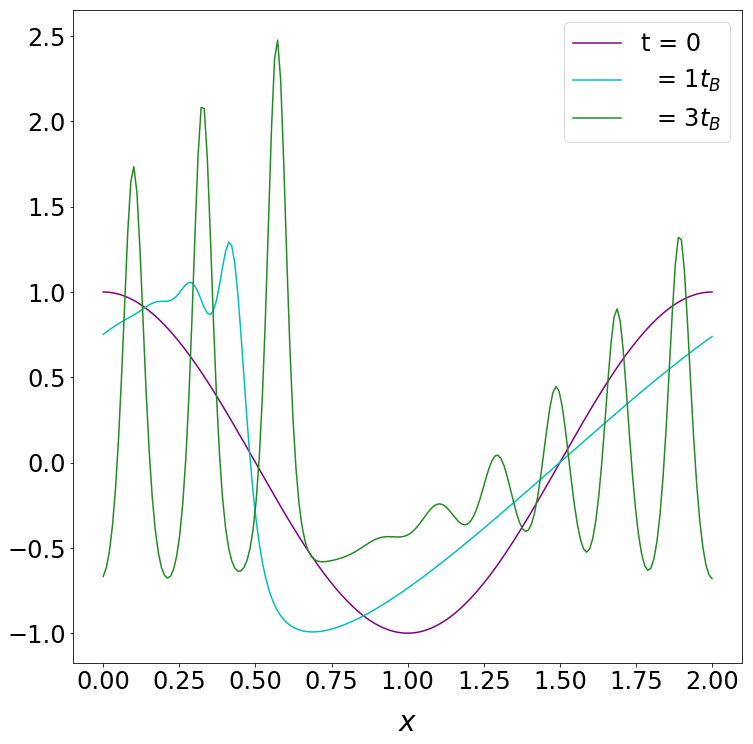

In [22]:
plt.plot(locations, kdv_grid[:, 0], label='t = 0', color='purple')
plt.plot(locations, kdv_grid[:, int((1 / np.pi) / delta_t)], label=r'  = $1 t_B$', color='c')
plt.plot(locations, kdv_grid[:, int((3 / np.pi) / delta_t)], label=r'  = $3 t_B$', color='forestgreen')

plt.xlabel(r'$x$')

plt.legend()
plt.show()

Here, we plot the waveform evolved according to the KdV equation at three times: $t = 0, 1t_B, \text{ and } 3t_B$ where $t_B = 1/\pi$ is the characteristic time to breakdown of the system. At this time, a singularity forms and $\frac{\partial u}{\partial x}$ diverges, causing soliton trains to form (the peaks), which move indpendently across the space. At $t = 3t_B$ there exist 9 identifiable solitons.

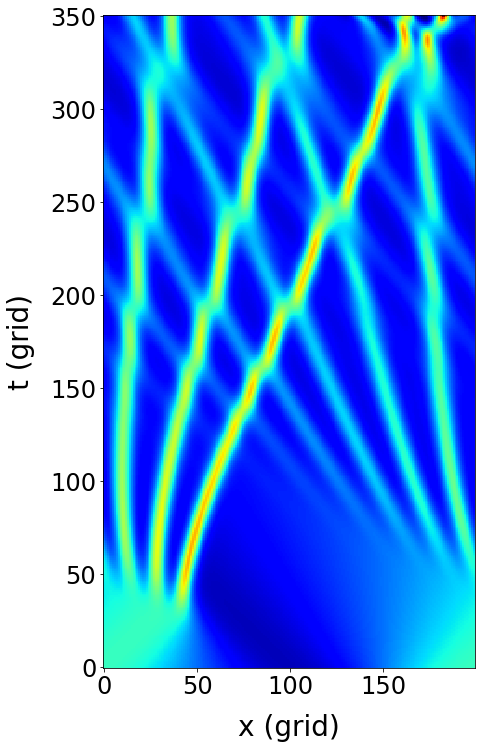

In [23]:
plt.imshow(kdv_grid[:, (times / delta_t).astype(int)[::1000]].T, origin='lower', cmap='jet')
plt.xlabel("x (grid)")
plt.ylabel("t (grid)")
plt.show()

Here, we show a contour plot of the grid, showing the initial waves breaking down into solitons and displaying the solitons' particle-like trajectories (the curved and straight lines). Note how the wavefronts change once two solitons collide.

We can also plot the wave as a function at several points in time and create a movie of the wave evolving in time.

In [24]:
for t in (times / delta_t).astype(int)[::2000]:
    plt.plot(locations, kdv_grid[:, t], color='k')
    plt.ylim(-1.2, 3)
    plt.xlabel(r"$x$")
    plt.savefig("images/image_%06d.jpg" % t)
    plt.close()

Here, we show a movie of the initial wave evolving in time.

![](movie.gif)